<a href="https://colab.research.google.com/github/Siuuuuuu0/ML-DL/blob/main/CV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
from torch import nn
import random

import torchvision
from torchvision import transforms
from torchvision.transforms import ToTensor
from torchvision import datasets
from torch.utils.data import DataLoader
from timeit import default_timer as timer
from tqdm.auto import tqdm

import matplotlib.pyplot as plt

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
torch.manual_seed(52)

In [ ]:
train_data  = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor(),
    target_transform=None
)

test_data  = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform=None
)


In [ ]:
class_names = train_data.classes

In [ ]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
img, label = train_data[0]

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

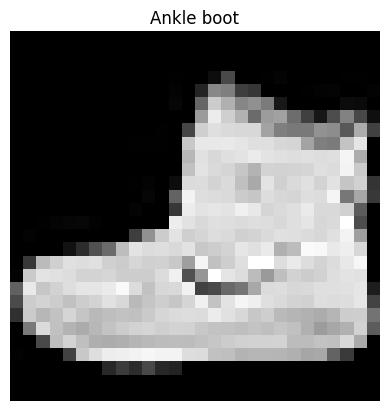

In [ ]:
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

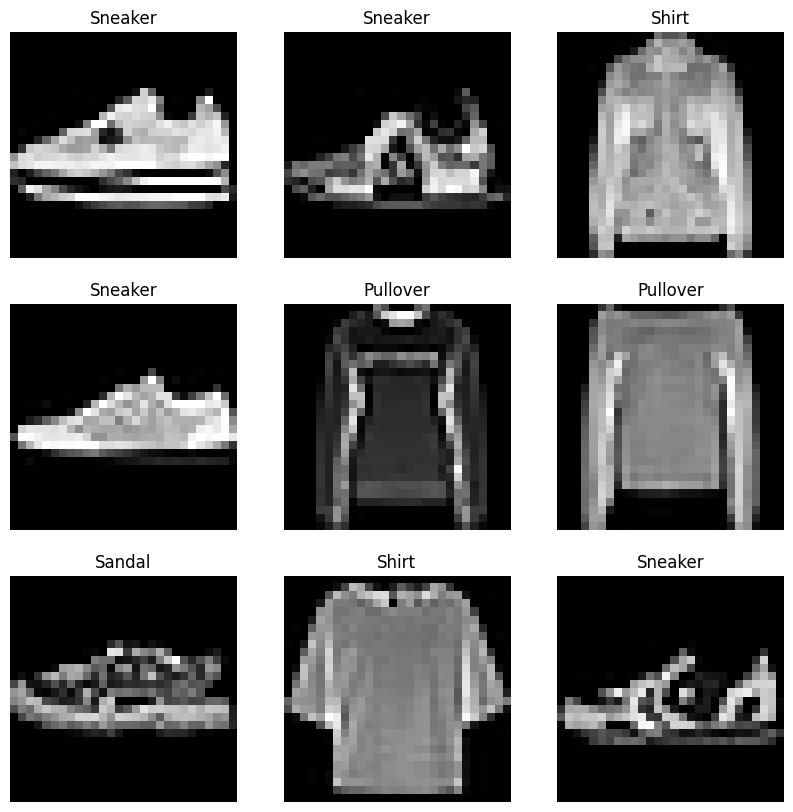

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10, 10))

for i in range(3):
  for j in range(3):
    idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[idx]
    axes[i, j].imshow(img.squeeze(), cmap="gray")
    axes[i, j].set_title(class_names[label])
    axes[i, j].axis(False)

In [ ]:
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
len(train_dataloader), len(test_dataloader)

(1875, 313)

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))

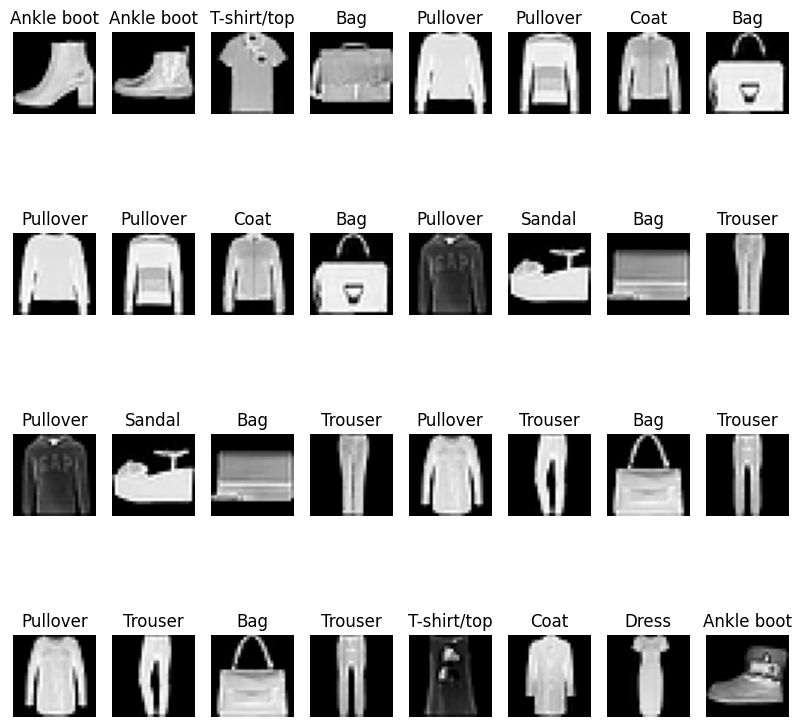

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=8, figsize=(10,10))

for i in range(4):
  for j in range(8):
    idx = i*4+j
    img, label = train_features_batch[idx], train_labels_batch[idx]
    axes[i, j].imshow(img.squeeze(), cmap="gray")
    axes[i, j].set_title(class_names[label])
    axes[i, j].axis(False)

In [ ]:
class FashionModel(nn.Module):
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int
  ):
    super().__init__()
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.Linear(in_features=hidden_units, out_features=output_shape)
  )

  def forward(self, x):
    return self.layer_stack(x)

In [ ]:
model = FashionModel(
    input_shape = 28*28,
    hidden_units = 16,
    output_shape = len(class_names)
).to(device)

In [ ]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.1)

In [ ]:
def print_train_time(
    start,
    end,
    device
):
  total_time = end-start
  print(f"Train time on {device} : {total_time:.3f} seconds")
  return total_time

In [ ]:
train_time_start_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}")
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    X, y = X.to(device), y.to(device)
    model.train()
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch%400 == 0:
      print(f"Looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples")
  train_loss /= len(train_dataloader)

  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in test_dataloader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)
    print(f"Train loss: {train_loss:.2f}, Test loss: {test_loss:.2f}, Test acc: {test_acc:.2f}")

train_time_end_cpu = timer()
train_time_model_base = print_train_time(start=train_time_start_cpu, end=train_time_end_cpu, device=next(model.parameters()).device)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 0
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.59, Test loss: 0.51, Test acc: 81.75
Epoch 1
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.48, Test loss: 0.49, Test acc: 82.42
Epoch 2
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.45, Test loss: 0.60, Test acc: 80.72
Epoch 3
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples
Train loss: 0.44, Test loss: 0.49, Test acc: 83.00
Epoch 4
Looked at 0/60000 samples
Looked at 12800/60000 samples


In [ ]:
def eval_model(model, data_loader, loss_fn, accuracy_fn, device=device):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name":model.__class__.__name__, "model_loss":loss.item(), "model_acc":acc}

model_results = eval_model(model=model, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn, device=device)
model_results

In [ ]:
!nvidia-smi

In [ ]:
class FashionModelNonLinear(FashionModel):
  def __init__(
      self,
      input_shape: int,
      hidden_units: int,
      output_shape: int
  ):
    super().__init__(input_shape, hidden_units, output_shape)
    self.layer_stack = nn.Sequential(
      nn.Flatten(),
      nn.Linear(in_features=input_shape, out_features=hidden_units),
      nn.ReLU(),
      nn.Linear(in_features=hidden_units, out_features=output_shape),
      nn.ReLU()
  )

In [ ]:
model_non_linear = FashionModelNonLinear(
    input_shape = 28*28,
    hidden_units = 16,
    output_shape = len(class_names)
).to(device)
model_non_linear

In [ ]:
optimizer = torch.optim.SGD(params=model_non_linear.parameters(), lr=0.1)

In [ ]:
def train_step(model, data_loader, loss_fn, optimizer, accuracy_fn, device=device):
  train_loss, train_acc = 0, 0
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.2f}, Train acc: {train_acc:.2f}%")

In [ ]:
def test_step(model, data_loader, loss_fn, accuracy_fn, device=device):
  test_loss, test_acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)

      test_loss += loss_fn(test_pred, y)

      test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.2f}, Test acc: {test_acc:.2f}%")

In [ ]:
train_time_start_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}")

  train_step(model_non_linear, train_dataloader, loss_fn, optimizer, accuracy_fn)

  test_step(model_non_linear, test_dataloader, loss_fn, accuracy_fn)

train_time_end_cpu = timer()
train_time_model_nn = print_train_time(start=train_time_start_cpu, end=train_time_end_cpu, device=next(model_non_linear.parameters()).device)

In [ ]:
model_results_nn = eval_model(model=model_non_linear, data_loader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)
model_results_nn

In [ ]:
class FashionModelCNN(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.classifier(x)
    return x


In [ ]:
model_cnn = FashionModelCNN(input_shape=1, hidden_units=10, output_shape=len(class_names)).to(device)
model_cnn

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_cnn.parameters(), lr=0.1)

In [ ]:
train_time_start_cpu = timer()

epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch {epoch}")

  train_step(model_cnn, train_dataloader, loss_fn, optimizer, accuracy_fn)

  test_step(model_cnn, test_dataloader, loss_fn, accuracy_fn)

train_time_end_cpu = timer()
train_time_model_cnn = print_train_time(start=train_time_start_cpu, end=train_time_end_cpu, device=next(model_cnn.parameters()).device)

In [ ]:
model_cnn_results = eval_model(
    model=model_cnn,
    data_loader = test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn = accuracy_fn,
    device = device
)

model_cnn_results

In [ ]:
compare_results = pd.DataFrame(
    [model_results,
    model_results_nn,
    model_cnn_results]
)

compare_results

In [ ]:
compare_results["training_time"]=[
    train_time_model_base,
    train_time_model_nn,
    train_time_model_cnn
]

compare_results

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model")
plt.show()

In [ ]:
def make_pred(model,
              data,
              device = device):
  pred_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [ ]:
test_samples = []

test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

In [ ]:
pred_probs = make_pred(model=model_cnn,
                       data=test_samples)

pred_classes = pred_probs.argmax(dim=1)

In [ ]:
plt.figure(figsize=(9, 9))

nrows = 3
ncols = 3

for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap="gray")
  pred_label = class_names[pred_classes[i]]
  truth_label = class_names[test_labels[i]]
  title_text = f"Pred: {pred_label}, Truth: {truth_label}"
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g")
  else:
    plt.title(title_text, fontsize=10, c="r")
  plt.axis(False)

In [ ]:
y_preds = []
model_cnn.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    X, y = X.to(device), y.to(device)
    y_logit = model_cnn(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

In [ ]:
import mlxtend

In [ ]:
mlxtend.__version__

In [ ]:
!pip install torchmetrics

In [ ]:
import torchmetrics
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names), task="multiclass")

confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

In [ ]:
fig, axes = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(),
    figsize = (10, 10),
    class_names = class_names,
    show_normed = True
)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

MODEL_NAME = "CNN.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

torch.save(obj=model_cnn.state_dict(),
           f=MODEL_SAVE_PATH)

In [ ]:
torch.manual_seed(52)

loaded_model_cnn = FashionModelCNN(input_shape=1,
                                   hidden_units=10,
                                   output_shape=len(class_names))

loaded_model_cnn.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_cnn.to(device)

In [ ]:
model_cnn_results

In [ ]:
torch.manual_seed(52)

loaded_model_cnn_results = eval_model(
    model=loaded_model_cnn,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_cnn_results

In [ ]:
torch.isclose(torch.tensor(model_cnn_results["model_loss"]),
              torch.tensor(loaded_model_cnn_results["model_loss"]),
              atol=1e-02)